# Лабораторная работа 6

# Задача 1

## Генерация датасетов

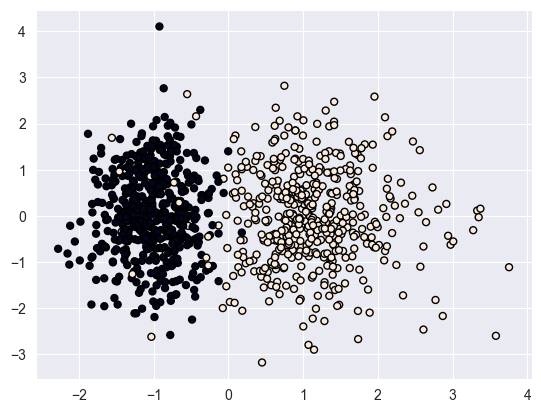

In [155]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


data_1, data_y_1 = make_classification(n_samples=1000, n_classes=2, n_features=4, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=130)

plt.scatter(data_1[:, 0], data_1[:, 1], marker="o", c=data_y_1, s=25, edgecolor="k")
plt.show()

In [156]:
data_1

array([[-0.90952572,  0.48491294, -1.12068824,  0.40999385],
       [ 1.93049348,  1.54362506, -0.18421958, -0.50597228],
       [-1.69217066, -0.60384575,  1.51656964, -0.52663804],
       ...,
       [-0.7765571 , -0.10860997, -1.2639567 , -0.26907455],
       [ 0.62264919, -0.89557185,  1.40254098,  1.06663477],
       [-1.04790133,  0.14001552, -0.9035024 , -0.40226156]])

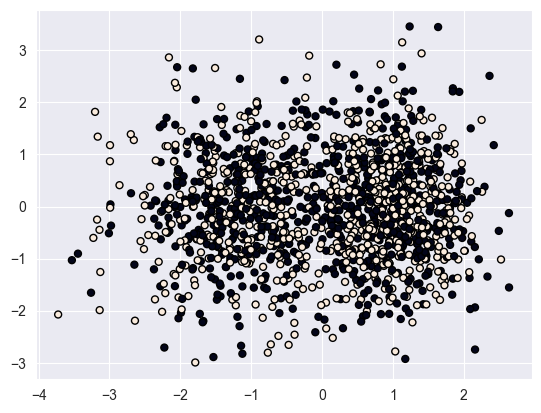

In [157]:
data_2, data_y_2 = make_classification(n_samples=1500, n_classes=2, n_features=3, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=100)

plt.scatter(data_2[:, 0], data_2[:, 1], marker="o", c=data_y_2, s=25, edgecolor="k")
plt.show()

In [158]:
data_2

array([[ 1.26280054,  0.04478654, -0.67379587],
       [-2.04477966,  0.41191998,  1.0421952 ],
       [-1.21707157,  1.02552984,  1.41824417],
       ...,
       [ 1.70922609, -0.12546678, -0.64908706],
       [ 0.57762513, -0.31496344, -0.25618871],
       [ 1.97437387,  0.82652967, -0.53050097]])

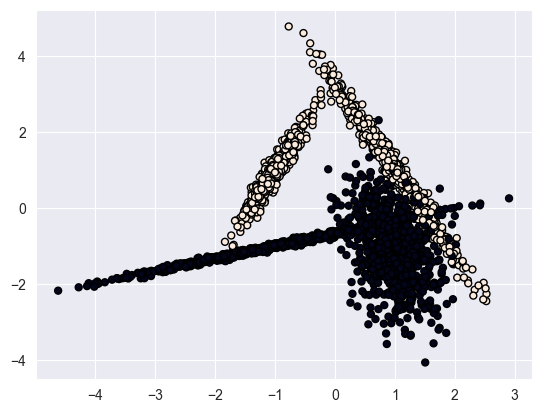

In [159]:
data_3, data_y_3 = make_classification(n_samples=3000, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=200)

plt.scatter(data_3[:, 0], data_3[:, 1], marker="o", c=data_y_3, s=25, edgecolor="k")
plt.show()

In [160]:
data_3

array([[ 0.72792321, -0.41572881],
       [-1.21346677, -1.0658058 ],
       [ 1.21269471, -0.46861516],
       ...,
       [ 0.04609667, -0.66288938],
       [-3.48102801, -1.83659556],
       [ 1.76014151, -0.8498032 ]])

# Кластеризация

## K - means

In [161]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(2, n_init='auto').fit(data_1)
kmeans_2 = KMeans(2, n_init='auto').fit(data_2)
kmeans_3 = KMeans(2, n_init='auto').fit(data_3)

D:\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [162]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score

def cluster_and_metrics_kmeans(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"силуэт: {rand_score(claster.labels_, data_y)}")
    print(f"rand score: {silhouette_score(data, claster.labels_)}\n")
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)
    plt.scatter(claster.cluster_centers_[:,0], claster.cluster_centers_[:,1], s=100, c='red')

Датасет: 1
силуэт: 0.6266346346346346
rand score: 0.24584162039125845


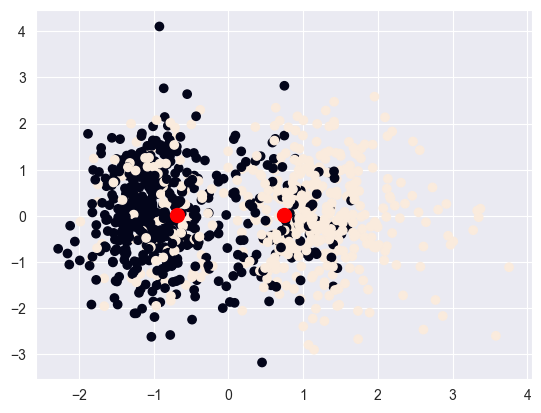

In [163]:
cluster_and_metrics_kmeans(data=data_1, data_y=data_y_1, claster=kmeans_1, num=1)

Датасет: 2
силуэт: 0.5144683122081387
rand score: 0.3043372442746141


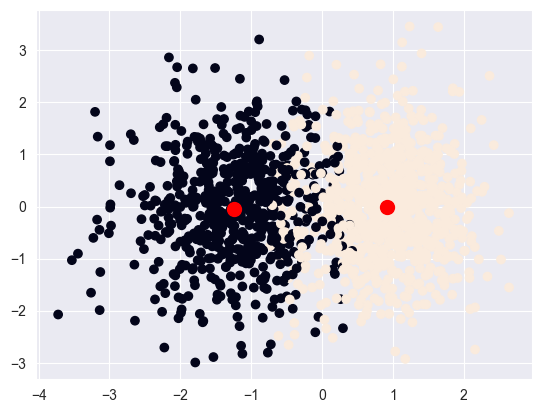

In [164]:
cluster_and_metrics_kmeans(data=data_2, data_y=data_y_2, claster=kmeans_2, num=2)

Датасет: 3
силуэт: 0.5470759141936201
rand score: 0.3923235456629251


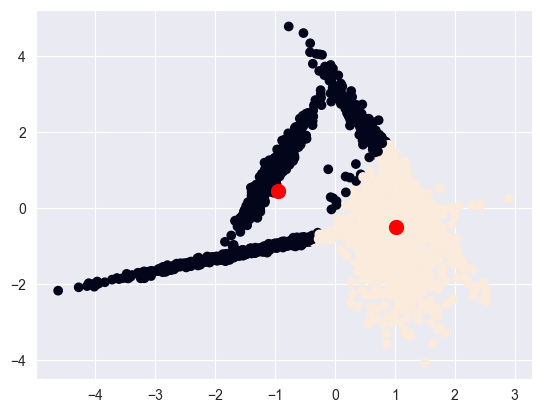

In [165]:
cluster_and_metrics_kmeans(data=data_3, data_y=data_y_3, claster=kmeans_3, num=3)

## Affinity propagation

In [166]:
from sklearn.cluster import AffinityPropagation

affinity_1 = AffinityPropagation(preference=-42).fit(data_1)
affinity_2 = AffinityPropagation(preference=-42).fit(data_2)
affinity_3 = AffinityPropagation(preference=-42).fit(data_3)

D:\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
D:\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [167]:
def cluster_and_metrics_affinity(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"силуэт: {rand_score(claster.labels_, data_y)}")
    print(f"rand score: {silhouette_score(data, claster.labels_)}\n")
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)
    plt.scatter(claster.cluster_centers_[:,0], claster.cluster_centers_[:,1], s=50, c='black')
    

Датасет: 1
силуэт: 0.5511251251251251
rand score: 0.195394999815684


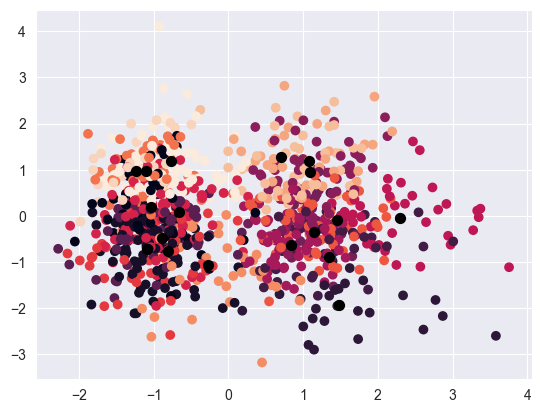

In [168]:
cluster_and_metrics_affinity(data=data_1, data_y=data_y_1, claster=affinity_1, num=1)

Датасет: 2
силуэт: 0.5345723815877251
rand score: 0.1768837890753222


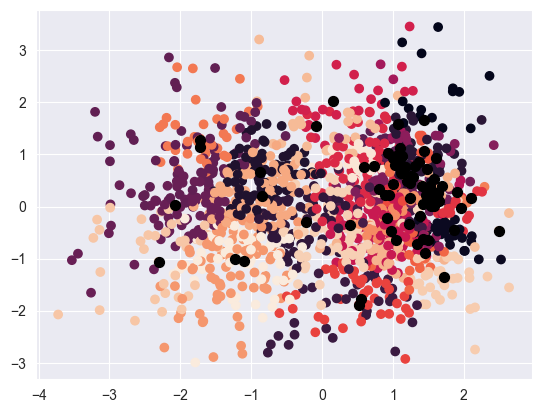

In [169]:
cluster_and_metrics_affinity(data=data_2, data_y=data_y_2, claster=affinity_2, num=2)

Датасет: 3
силуэт: 0.5011081471601645
rand score: 0.04452987345899265


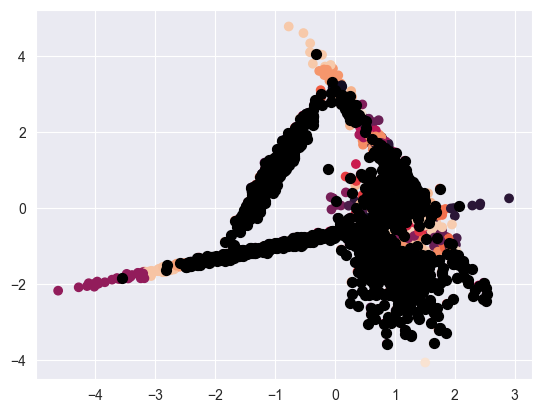

In [170]:
cluster_and_metrics_affinity(data=data_3, data_y=data_y_3, claster=affinity_3, num=3)

## DB-SCAN

In [171]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan_1 = DBSCAN().fit(data_1)
dbscan_2 = DBSCAN().fit(data_2)
dbscan_3 = DBSCAN().fit(data_3)

In [172]:
def cluster_and_metrics_dbscan(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"силуэт: {rand_score(claster.labels_, data_y)}")
    print(f"rand score: {silhouette_score(data, claster.labels_)}\n")
    print(np.unique(claster.labels_))
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)

Датасет: 1
силуэт: 0.5482302302302302
rand score: -0.31618336860984264

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


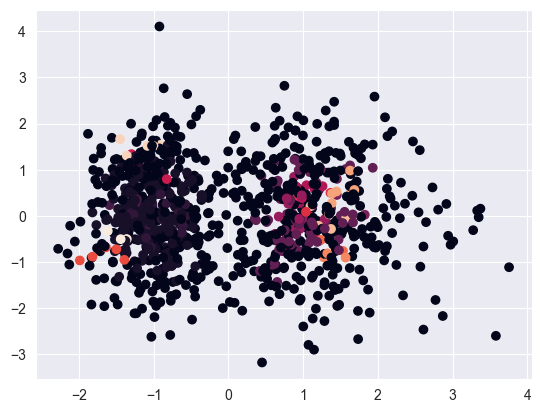

In [173]:
cluster_and_metrics_dbscan(data=data_1, data_y=data_y_1, claster=dbscan_1, num=1)

Датасет: 2
силуэт: 0.5009517456081832
rand score: 0.04748761324413239

[-1  0  1  2]


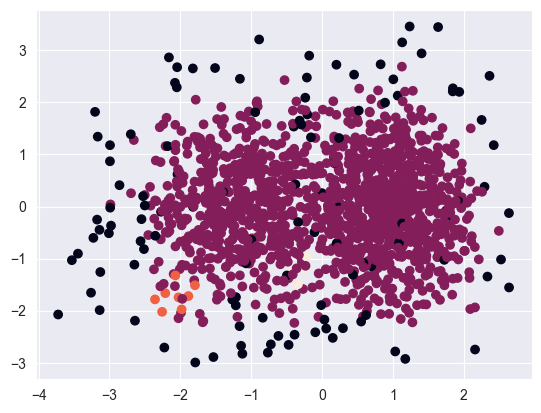

In [174]:
cluster_and_metrics_dbscan(data=data_2, data_y=data_y_2, claster=dbscan_2, num=2)

Датасет: 3
силуэт: 0.49983327775925307
rand score: 0.5267915196949305

[-1  0]


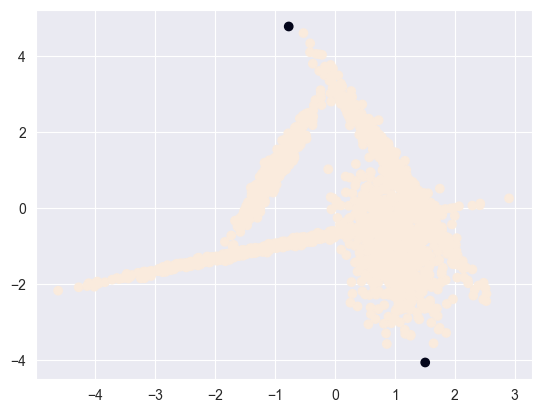

In [175]:
cluster_and_metrics_dbscan(data=data_3, data_y=data_y_3, claster=dbscan_3, num=3)

## Gaussian Mixtures, EM

In [176]:
from sklearn.mixture import GaussianMixture

gm_1 = GaussianMixture(n_components=3).fit(data_1)
gm_1.predict(data_1)

gm_2 = GaussianMixture(n_components=3).fit(data_2)
gm_2.predict(data_2)

gm_3 = GaussianMixture(n_components=3).fit(data_3)
gm_3.predict(data_3)

D:\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


array([2, 2, 0, ..., 2, 2, 0], dtype=int64)

In [177]:
def cluster_and_metrics_gm(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    plt.scatter(data[:,0], data[:,1], c=claster.predict(data))
    plt.scatter(claster.means_[:,0], claster.means_[:,1], s=100, c='red')

Датасет: 1


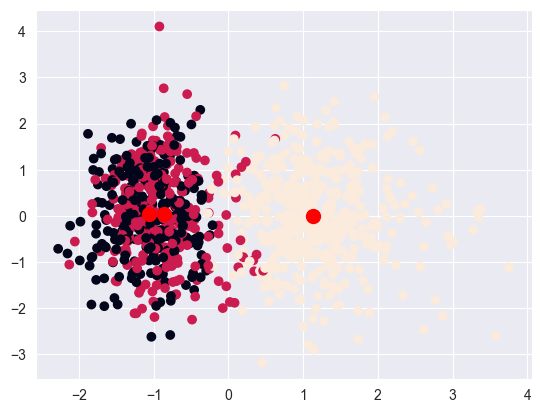

In [178]:
cluster_and_metrics_gm(data=data_1, data_y=data_y_1, claster=gm_1, num=1)

Датасет: 2


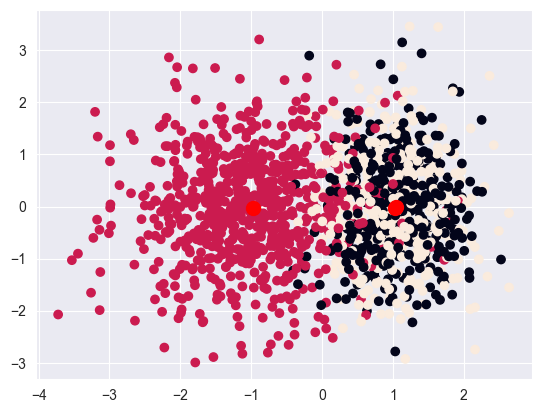

In [179]:
cluster_and_metrics_gm(data=data_2, data_y=data_y_2, claster=gm_2, num=2)

Датасет: 3


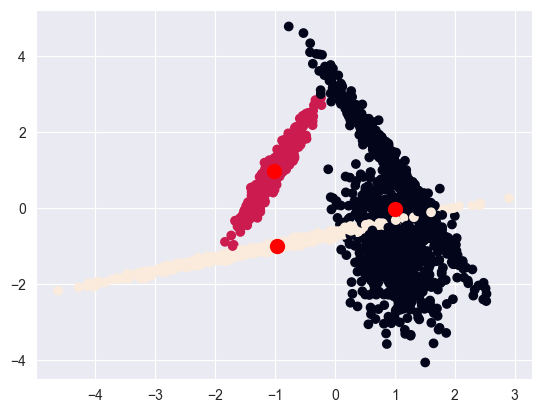

In [180]:
cluster_and_metrics_gm(data=data_3, data_y=data_y_3, claster=gm_3, num=3)

## Иерархическая кластеризация

In [181]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

clusters_1 = hierarchy.linkage(data_1, method="ward")
clusters_2 = hierarchy.linkage(data_2, method="ward")
clusters_3 = hierarchy.linkage(data_3, method="ward")

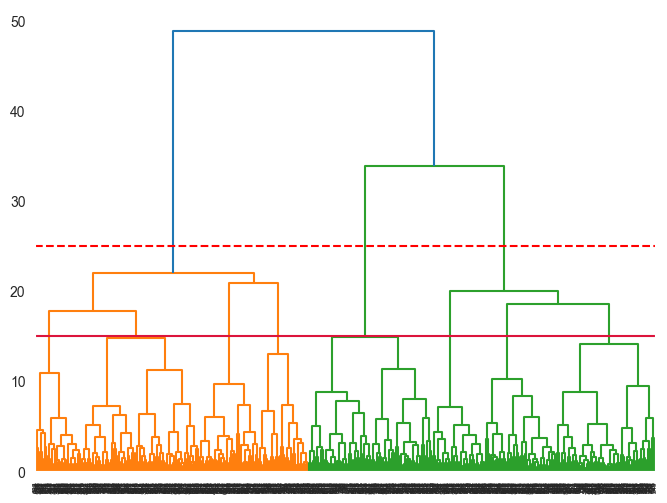

In [182]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_1)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

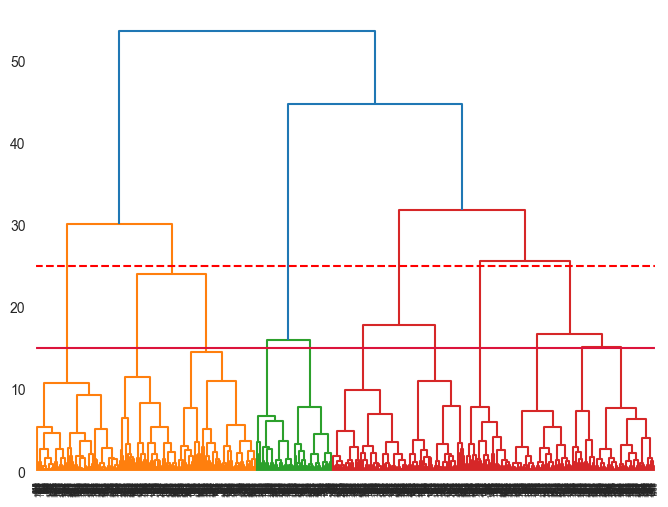

In [183]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_2)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

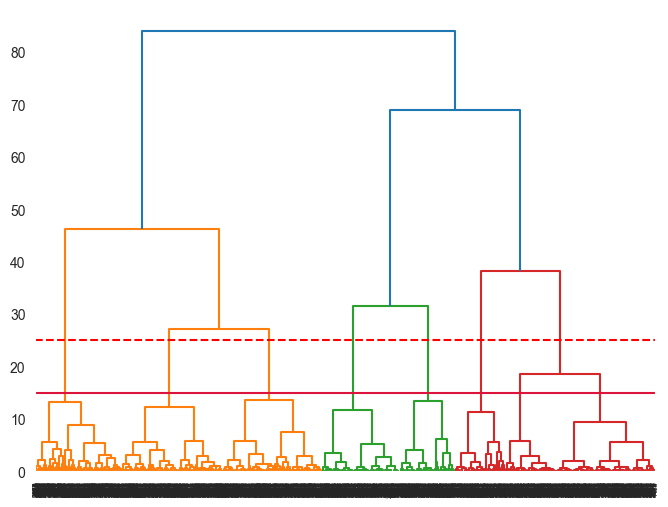

In [184]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_3)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

In [185]:
def cluster_and_metrics_cluster(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data)
    plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

Датасет: 1


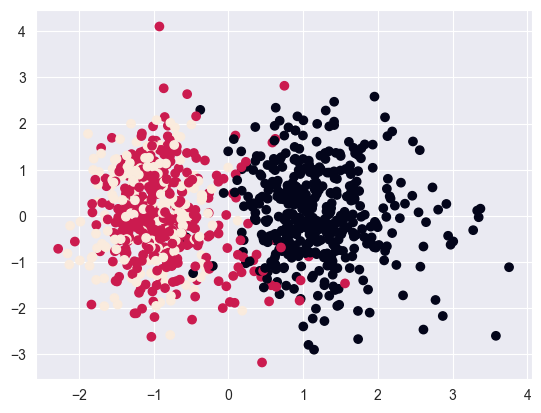

In [186]:
cluster_and_metrics_cluster(data=data_1, data_y=data_y_1, claster=clusters_1, num=1)

Датасет: 2


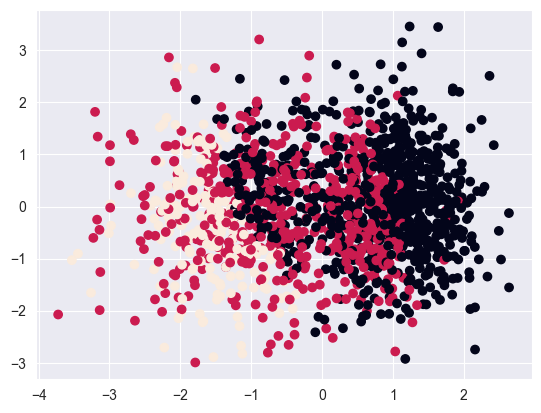

In [187]:
cluster_and_metrics_cluster(data=data_2, data_y=data_y_2, claster=clusters_2, num=2)

Датасет: 3


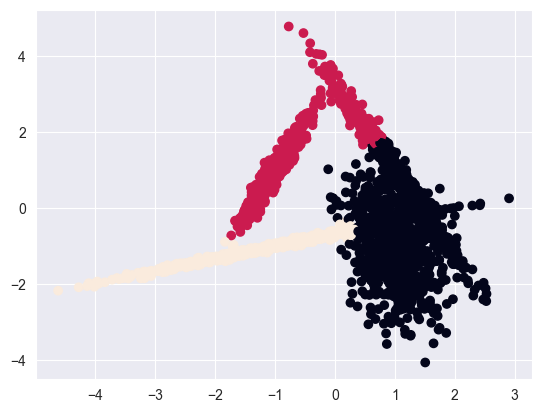

In [188]:
cluster_and_metrics_cluster(data=data_3, data_y=data_y_3, claster=clusters_3, num=3)

## Карты Кохонена

In [189]:
from sklearn_som.som import SOM

In [190]:
iris_som = SOM(m=2, n=4, dim=2)
iris_som.fit(data_1)
predictions_1 = iris_som.predict(data_1)
predictions_1

ValueError: operands could not be broadcast together with shapes (2,4) (2,2) 

In [ ]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_2)
predictions_2 = iris_som.predict(data_2)
predictions_2

In [ ]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_3)
predictions_3 = iris_som.predict(data_3)
predictions_3

# Задача 2